In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nn(x, w): return np.sign(np.dot(x, w)).astype(int)

In [3]:
x = np.array([[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])
t = np.array([-1, -1, 1, 1, 1])

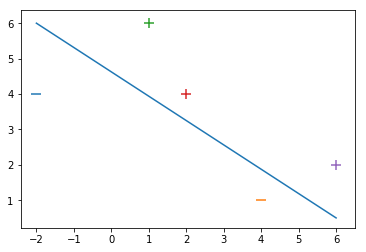

In [4]:
# https://maviccprp.github.io/a-support-vector-machine-in-just-a-few-lines-of-python-code/
for d, sample in enumerate(x):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2,6],[6,0.5])

In [5]:
ld = 1 / 1000

In [6]:
n_samples, n_features = x.shape

In [7]:
w = np.zeros(n_features)

In [8]:
w

array([ 0.,  0.,  0.])

In [9]:
nn(x, w)

array([0, 0, 0, 0, 0])

In [10]:
np.sign([0, 10, -11])

array([ 0,  1, -1])

In [11]:
t

array([-1, -1,  1,  1,  1])

In [12]:
nn(x, w)

array([0, 0, 0, 0, 0])

In [13]:
np.multiply(t, nn(x, w))

array([0, 0, 0, 0, 0])

In [14]:
np.fmax(1 - np.multiply(t, nn(x, w)), 0)

array([1, 1, 1, 1, 1])

In [15]:
w

array([ 0.,  0.,  0.])

In [16]:
w ** 2

array([ 0.,  0.,  0.])

In [17]:
np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0) 

array([ 1.,  1.,  1.,  1.,  1.])

In [18]:
np.sum(np.multiply(t.reshape(-1,1), x), 0)

array([ 7,  7, -1])

In [19]:
t

array([-1, -1,  1,  1,  1])

In [20]:
t.T

array([-1, -1,  1,  1,  1])

In [21]:
t == t.T

array([ True,  True,  True,  True,  True], dtype=bool)

In [22]:
np.sum(np.multiply(t.reshape(-1,1), x) * np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0).reshape(-1,1), 0) 

array([ 7.,  7., -1.])

In [23]:
np.sum(np.fmax(1 - np.multiply(t, nn(x, w)), 0).reshape(-1, 1) + np.sum(ld * w ** 2, 0))

5.0

In [24]:
x, t.reshape(-1, 1), x * t.reshape(-1, 1)

(array([[-2,  4, -1],
        [ 4,  1, -1],
        [ 1,  6, -1],
        [ 2,  4, -1],
        [ 6,  2, -1]]), array([[-1],
        [-1],
        [ 1],
        [ 1],
        [ 1]]), array([[ 2, -4,  1],
        [-4, -1,  1],
        [ 1,  6, -1],
        [ 2,  4, -1],
        [ 6,  2, -1]]))

In [25]:
np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0).reshape(-1,1)

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [26]:
def cost(y, t, w, ld): return np.sum(is_misclassified(w, x, t)) + ld * np.sum(w ** 2, 0)

In [27]:
def cost(y, t, w, ld): return np.sum(is_misclassified(w, x, t)) + ld * (np.linalg.norm(w, ord=2) ** 2)

In [28]:
def is_misclassified(w, x, t): return np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0).reshape(-1,1)

In [29]:
def is_misclassified(w, x, t): return (np.multiply(t, np.dot(x, w)) < 1).astype(int).reshape(-1,1)

In [30]:
def gradient(w, x, t, ld): return np.sum((2 * ld * w) - x * t.reshape(-1, 1) * is_misclassified(w, x, t), 0)

In [31]:
def delta_w(w, x, t, learning_rate, ld):
    return learning_rate * gradient(w, x, t, ld)

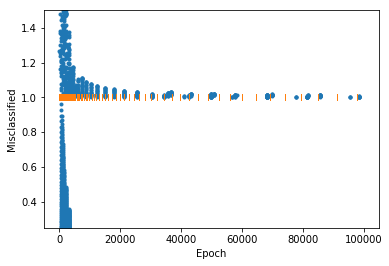

(0,
 0.0042060248537924309,
 array([  1.58876117,   3.17458055,  11.11863105]),
 array([  3.19010824,   3.70734226,  19.91675431]))

In [32]:
learning_rate = 1; nb_of_iterations = 100000

w = np.zeros(n_features)
costs = []
costs_mis = []
w_ref = np.zeros(n_features)
cost_ref = 0
costs_ref = []
not_sames = []

w_cost = [(w, np.zeros(n_features), cost(nn(x, w), t, w, ld))]

for epoch in range(1, nb_of_iterations):
    ld = 1 / epoch
    
    # print((- learning_rate * ((2 * ld * w) - x * t.reshape(-1, 1) * is_misclassified(w, x, t))))
    
    w = w - delta_w(w, x, t, learning_rate, ld)
    w_cost.append((w, is_misclassified(w, x, t), delta_w(w, x, t, learning_rate, ld), cost(nn(x, w), t, w, ld)))
    costs_mis.append(np.max(is_misclassified(w, x, t)) - 0.5)
    costs.append(cost(nn(x, w), t, w, ld))

    mis = is_misclassified(w_ref, x, t).reshape(-1, )
    cost_ref = 0
    not_same = 0.0
    delta_w_ref_sum = []
    for i, x_ in enumerate(x):  
        if (t[i] * np.dot(x[i], w_ref)) < 1:
            delta_w_ref = learning_rate * ( (x[i] * t[i]) + (-2 * ld * w_ref) )
            cost_ref = 1
            if mis[i] != 1:
                not_same = 1.3
        else:
            delta_w_ref = learning_rate * (-2 * ld * w_ref)
            if mis[i] != 0:
                not_same = 1.3
                
        w_ref = w_ref + delta_w_ref
        delta_w_ref_sum.append(delta_w_ref)
        # print(delta_w_ref)
    # print(delta_w_ref_sum)        
                
    costs_ref.append(cost_ref)
    not_sames.append(not_same)
    
# plt.plot(costs_mis, 'o')
plt.plot(costs, '.')
plt.plot(costs_ref, '|') 
# plt.plot(not_sames, 's')
plt.ylim(0.25, 1.5)
# plt.axes().set_yticklabels([])
plt.xlabel('Epoch')
plt.ylabel('Misclassified')
plt.show()

costs_ref[-1], costs[-1], w_ref, w

In [33]:
mis_raw = np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0)
mis_raw

array([ 0.,  0.,  0.,  0.,  0.])

In [34]:
x * t.reshape(-1, 1)

array([[ 2, -4,  1],
       [-4, -1,  1],
       [ 1,  6, -1],
       [ 2,  4, -1],
       [ 6,  2, -1]])

In [35]:
mis_raw, x, t

(array([ 0.,  0.,  0.,  0.,  0.]), array([[-2,  4, -1],
        [ 4,  1, -1],
        [ 1,  6, -1],
        [ 2,  4, -1],
        [ 6,  2, -1]]), array([-1, -1,  1,  1,  1]))

In [36]:
x * t.reshape(-1, 1) * mis_raw.reshape(-1, 1)

array([[ 0., -0.,  0.],
       [-0., -0.,  0.],
       [ 0.,  0., -0.],
       [ 0.,  0., -0.],
       [ 0.,  0., -0.]])

In [37]:
mis_raw.shape

(5,)

In [ ]:
mis_raw.reshape(-1, 1).reshape(-1, )

array([ 0.,  0.,  0.,  0.,  0.])

In [ ]:
(np.multiply(t, np.dot(x, w)) < 1).astype(int)

In [ ]:
np.fmax(np.sign(1 - np.multiply(t, np.dot(x, w))), 0).reshape(-1,1)

In [ ]:
x * t.reshape(-1, 1) * is_misclassified(w, x, t)

In [ ]:
a = (2 * ld * w) - x * t.reshape(-1, 1) * is_misclassified(w, x, t)
b = np.sum(a, 0)
a, b

In [ ]:
cost(nn(x, w), t, w, ld)

In [ ]:
ld * w ** 2, 0

In [ ]:
w, np.sum(w ** 2, 0), np.linalg.norm(w, ord=2) ** 2

In [ ]:
def nn(x, w): return np.sign(np.dot(x, w)).astype(int)
x = np.array([[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])
t = np.array([-1, -1, 1, 1, 1])
def cost(y, t, w, ld): return np.sum(is_misclassified(w, x, t)) + ld * (np.linalg.norm(w, ord=2) ** 2)
def is_misclassified(w, x, t): return (np.multiply(t, np.dot(x, w)) < 1).astype(int).reshape(-1,1)
def gradient(w, x, t, ld): return np.sum((2 * ld * w) - x * t.reshape(-1, 1) * is_misclassified(w, x, t), 0)
def delta_w(w, x, t, learning_rate, ld): return learning_rate * gradient(w, x, t, ld)

learning_rate = 1; nb_of_iterations = 100000

w = np.zeros(n_features)
costs = []

for epoch in range(1, nb_of_iterations):
    ld = 1 / epoch    
    w = w - delta_w(w, x, t, learning_rate, ld)
    costs.append(cost(nn(x, w), t, w, ld))

w, costs[:5], costs[-5:]

In [5]:
def nn(x, w): return np.sign(np.dot(x, w)).astype(int)
def cost(y, t, w, ld): return is_misclassified(w, x, t) + ld * (np.linalg.norm(w, ord=2) ** 2)
def is_misclassified(w, x, t): return (t * np.dot(x, w) < 1).astype(int)
def gradient(w, x, t, ld): return 2 * ld * w - x * t * is_misclassified(w, x, t)

x = np.array([[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])
t = np.array([-1, -1, 1, 1, 1])
learning_rate = 1; nb_of_iterations = 100000; w = np.zeros(n_features); costs = []

for epoch in range(1, nb_of_iterations):
    ld = 1 / epoch
    error = 0
    for i, x_ in enumerate(x):              
        w = w - learning_rate * gradient(w, x[i], t[i], ld)
        # costs.append(cost(nn(x, w), t, w, ld))
        if is_misclassified(w, x[i], t[i]):
            error = 1
    costs.append(error)

w, costs[:5], costs[-5:]

(array([  1.58876117,   3.17458055,  11.11863105]),
 [1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0])

In [3]:
x = np.array([[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])
t = np.array([-1, -1, 1, 1, 1])
learning_rate = 1; nb_of_iterations = 100000; n_samples, n_features = x.shape; w = np.zeros(n_features); costs = []

def nn(x, w): return np.sign(np.dot(x, w)).astype(int)
def cost(y, t, w, ld): return max(1 - t * np.dot(x, w), 0) + ld * (np.linalg.norm(w, ord=2) ** 2)
def is_misclassified(w, x, t): return (t * np.dot(x, w) < 1).astype(int)
def gradient(w, x, t, ld): return 2 * ld * w - x * t * is_misclassified(w, x, t)

for epoch in range(1, nb_of_iterations):
    ld = 1 / epoch
    error = 0
    for i, x_ in enumerate(x):              
        w = w - learning_rate * gradient(w, x[i], t[i], ld)
        # costs.append(cost(nn(x, w), t, w, ld))
        if is_misclassified(w, x[i], t[i]):
            error = 1
    costs.append(error)

In [4]:
w, costs[:5], costs[-5:]

(array([  1.58876117,   3.17458055,  11.11863105]),
 [1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0])

In [8]:
x = np.array([[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])
t = np.array([-1, -1, 1, 1, 1])
learning_rate = 1; nb_of_iterations = 100000; n_samples, n_features = x.shape; w = np.zeros(n_features)

def nn(x, w): return np.sign(np.dot(x, w)).astype(int)
def cost(w, x, t, ld): return max(1 - t * np.dot(x, w), 0) + ld * (np.linalg.norm(w, ord=2) ** 2)
def is_misclassified(w, x, t): return (t * np.dot(x, w) < 1).astype(int)
def gradient(w, x, t, ld): return 2 * ld * w - x * t * is_misclassified(w, x, t)

costs = []
for epoch in range(1, nb_of_iterations):
    ld = 1 / epoch; error = 0
    for i, x_ in enumerate(x):              
        w = w - learning_rate * gradient(w, x[i], t[i], ld)
        error = cost(w, x[i], t[i], ld)
    costs.append(error)

w, costs[:5], costs[-5:]

(array([  1.58876117,   3.17458055,  11.11863105]),
 [125.00000000000001,
  20.5,
  0.13771048902888564,
  0.33270277832684497,
  0.47185560838000012],
 [0.0013634192550939879,
  0.0013631329528662499,
  0.0013628467136208933,
  0.0013625605373434335,
  0.0013622744240193879])

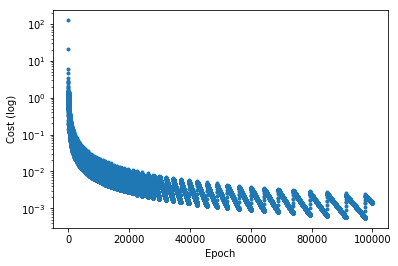

In [12]:
plt.plot(costs, '.')
plt.xlabel('Epoch')
plt.ylabel('Cost (log)')
plt.yscale('log')
plt.show()